Index(['Unnamed: 0', 'kahu', 'discharge', 'arki', '3day_arki', '3day_kahu',
       'kandaghat', 'solan', 'kasauli', '3day_solan', '3day_kasauli',
       '3day_kandaghat', '90day_kahu'],
      dtype='object')
<class 'pandas.core.series.Series'>
DatetimeIndex: 966 entries, 2010-05-31 to 2018-09-29
Series name: discharge
Non-Null Count  Dtype  
--------------  -----  
966 non-null    float64
dtypes: float64(1)
memory usage: 15.1 KB
None
             kahu        arki     3day_arki   3day_kahu   kandaghat  \
count  966.000000  966.000000  9.660000e+02  966.000000  966.000000   
mean     7.424379    8.873016  8.922507e+00    7.437008    7.665550   
std     16.127962   22.403519  1.593098e+01   10.533363   15.481552   
min      0.000000    0.000000  0.000000e+00    0.000000    0.000000   
25%      0.000000    0.000000  2.368476e-15    0.733333    0.000000   
50%      0.500000    0.000000  3.333333e+00    3.500000    0.000000   
75%      7.500000    7.293750  1.106458e+01    9.733333    7.8000

date
2010-05-31      0.368119
2010-06-04      0.254852
2010-06-05      0.368119
2010-06-06      0.283168
2010-06-07      0.509703
                 ...    
2018-09-25    207.251003
2018-09-26    130.653932
2018-09-27     80.504796
2018-09-28     66.601224
2018-09-29     54.849733
Name: discharge, Length: 966, dtype: float64

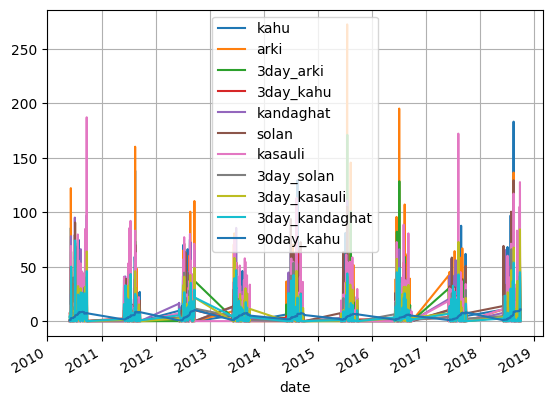

In [45]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
Q=pd.read_csv(r"D:\Dekstop\Dekstop folders\Data Science\python course\major project part 2\data3_new.csv",parse_dates=["date"],index_col="date").loc[:,"discharge"]
RF=pd.read_csv(r"D:\Dekstop\Dekstop folders\Data Science\python course\major project part 2\data3_new.csv",parse_dates=["date"],index_col="date")
print(RF.columns)
RF.drop("Unnamed: 0",axis=1,inplace=True)
RF.drop("discharge",axis=1,inplace=True)
#RF.drop(["rainfall"],axis=1,inplace=True)
print(Q.info())
print(RF.describe())

#Q=pd.Series(np.log(Q))

print(Q.describe())
import seaborn as sns

print(Q.info())
print(RF.describe())

#Q=pd.Series(np.log(Q))

print(Q.describe())
import seaborn as sns


RF.plot(grid=True)

Q

In [46]:
from random import randint
a=randint(0,100000)
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split

#x_train, y_train, x_val, y_val, x_test, y_test = train_valid_test_split(df, target="discharge",train_size=0.6,valid_size=0.2, test_size=0.2
 #                                                                    ,random_state=3138  )
x_train, x_test, y_train,y_test = train_test_split(RF,Q, test_size=0.2,random_state=a)
a
  # random_state= 45075,3138


53437

In [47]:
x_train=pd.concat([RF["2013"],RF["2014":"2016"]])
y_train=pd.concat([Q["2013"],Q["2014":"2016"]])
x_test=RF["2011"]
y_test=Q["2011"]
#x_val=RF["2018"]
#y_val=Q["2018"]

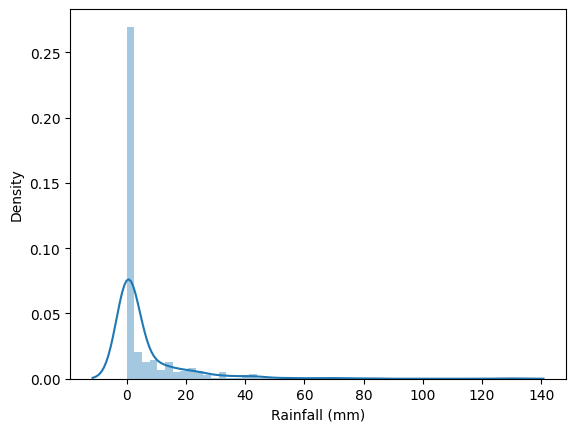

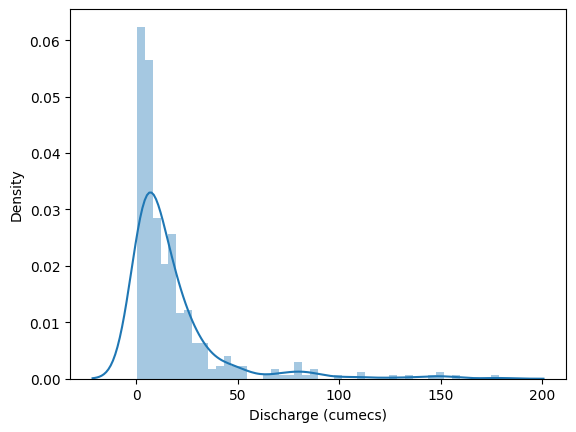

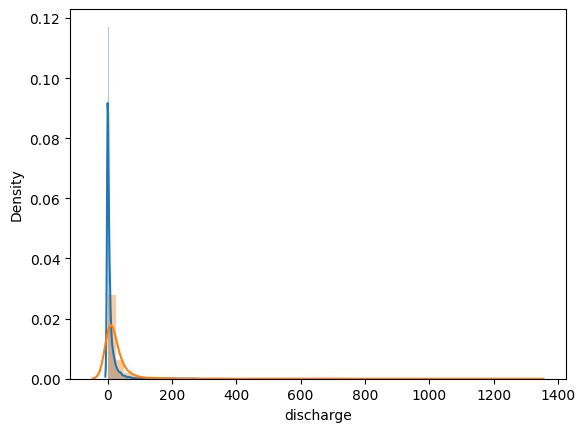

<Figure size 640x480 with 0 Axes>

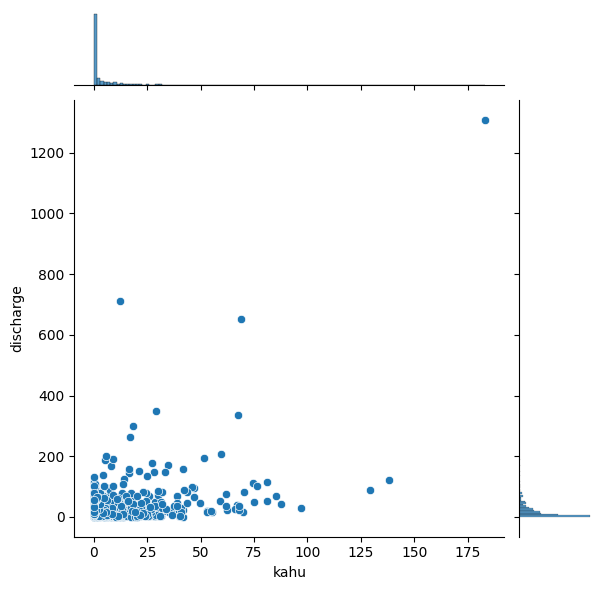

In [48]:
sns.distplot(x_train["kahu"])
plt.xlabel("Rainfall (mm)")
plt.savefig("Rainfall_Distribution_normal.png")
plt.show()
plt.clf()
sns.distplot(y_train)
plt.xlabel("Discharge (cumecs)")
plt.savefig("Discharge_Distribution_normal.png")
plt.show()
plt.clf()
sns.distplot(RF)

sns.distplot(Q)
plt.show()
plt.clf()
df=pd.concat([RF,Q],axis=1)
sns.jointplot("kahu","discharge",data=df)


In [49]:
y_test

date
2011-05-31     1.472476
2011-06-01     1.755645
2011-06-02     3.681190
2011-06-03     3.171487
2011-06-04     2.803368
                ...    
2011-09-15    20.246546
2011-09-16    21.152685
2011-09-17    15.630900
2011-09-18    13.478819
2011-09-19    12.289512
Name: discharge, Length: 103, dtype: float64

In [50]:
y_test.max()

138.41274813600123

count    103.000000
mean      18.757849
std       23.728820
min        1.217624
25%        5.691686
50%       11.808125
75%       22.072982
max      138.412748
Name: discharge, dtype: float64


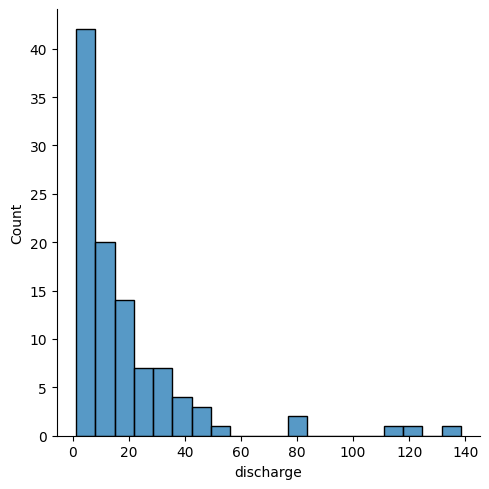

<Figure size 640x480 with 0 Axes>

In [51]:
print(y_test.describe())

sns.displot(y_test)
plt.show()
plt.clf()


count    442.000000
mean      17.524096
std       24.619812
min        0.368000
25%        4.418000
50%        9.189667
75%       19.441089
max      178.856556
Name: discharge, dtype: float64


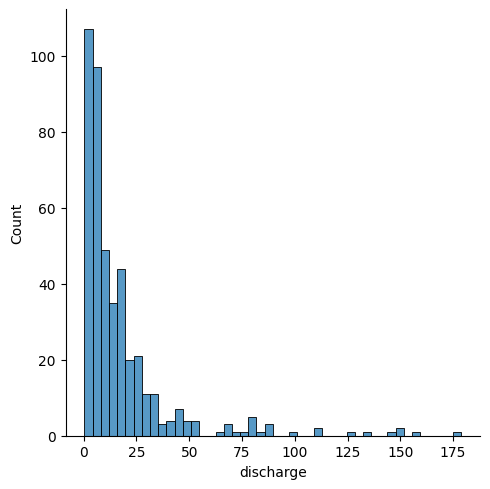

<Figure size 640x480 with 0 Axes>

In [52]:
print(y_train.describe())

sns.displot(y_train)
plt.show()
plt.clf()


In [53]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(x_train,y_train)
x_test=scaler.transform(x_test).reshape(x_test.shape[0],1,x_test.shape[1])
#y_train=scaler.transform(y_train)
x_train=scaler.transform(x_train).reshape(x_train.shape[0],1,x_train.shape[1])
#x_val=scaler.transform(x_val)
x_train.shape

(442, 1, 11)

In [54]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [55]:
# choose a number of time steps
#n_steps = 2
# split into samples
#x_train, y_train = lstm_data_transform(x_train, y_train,n_steps)
#x_test,y_test= lstm_data_transform(x_test, y_test,n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
#x_test.shape


In [56]:
import tensorflow
from keras import regularizers
l2_reg = regularizers.L1L2(l1=0.45,l2=0.69)

from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
model=keras.Sequential([keras.layers.Dropout(0.3),
                keras.layers.LSTM(12,input_shape=(1,11),activation="relu"), keras.layers.Dropout(0.3),               
#                keras.layers.Dense(17,activation="tanh"),keras.layers.Dropout(0.4),
#                keras.layers.LSTM(50,activation="tanh"),  keras.layers.Dropout(0.3),
#                keras.layers.Dense(10,activation="tanh",kernel_regularizer=l2_reg),keras.layers.Dropout(0.4),
#                keras.layers.Dense(9,activation="tanh",kernel_regularizer=l2_reg),keras.layers.Dropout(0.4),
#                keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(6,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#              keras.layers.Dense(4,activation="tanh"),keras.layers.Dropout(0.3)
#                keras.layers.Dense(3,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(2,activation="tanh"),keras.layers.Dropout(0.3),
                keras.layers.Dense(1,activation="relu")])
# Create the optimizer with the initial learning rate

from keras.optimizers import Adam,SGD
opt = Adam(learning_rate=0.0005)

model.compile(optimizer=opt,loss="mean_squared_error")


model.fit(x_train,y_train,batch_size=30,epochs=800)



from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))


y_pred_training=model.predict(x_train).reshape(-1,1)
y_pred=model.predict(x_test).reshape(-1,1)


error=mean_absolute_error(y_train,y_pred_training)
print(error)

##r2
score=r2_score(y_train,y_pred_training)
n=x_train.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")
 

print("now testing data: \n")
error=mean_squared_error(y_test,y_pred)
print(error)
error=mean_absolute_error(y_test,y_pred)
print(error)
score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

arr=[]
for a in y_pred:
    for b in a:
        arr.append(b)

y_pred0=arr


print("now testing data: \n")
error=mean_squared_error(y_test,y_pred)
print(error)
error=mean_absolute_error(y_test,y_pred)
print(error)
score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

arr=[]
for a in y_pred:
    for b in a:
        arr.append(b)

y_pred0=arr


Epoch 1/800
15/15 [==============================] - 1s 9ms/step - loss: 906.3950
Epoch 2/800
15/15 [==============================] - 0s 10ms/step - loss: 905.1669
Epoch 3/800
15/15 [==============================] - 0s 8ms/step - loss: 903.8066
Epoch 4/800
15/15 [==============================] - 0s 7ms/step - loss: 896.7836
Epoch 5/800
15/15 [==============================] - 0s 6ms/step - loss: 902.6746
Epoch 6/800
15/15 [==============================] - 0s 6ms/step - loss: 903.0068
Epoch 7/800
15/15 [==============================] - 0s 8ms/step - loss: 897.8787
Epoch 8/800
15/15 [==============================] - 0s 7ms/step - loss: 902.1003
Epoch 9/800
15/15 [==============================] - 0s 6ms/step - loss: 890.6750
Epoch 10/800
15/15 [==============================] - 0s 6ms/step - loss: 889.5756
Epoch 11/800
15/15 [==============================] - 0s 5ms/step - loss: 890.8218
Epoch 12/800
15/15 [==============================] - 0s 6ms/step - loss: 886.6848
Epoch 13/800

In [57]:
import tensorflow
from keras import regularizers
l2_reg = regularizers.L1L2(l1=0.45,l2=0.69)

from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
model=keras.Sequential([keras.layers.Dropout(0.3),
                keras.layers.LSTM(12,input_shape=(1,11),activation="relu"), keras.layers.Dropout(0.3),               
#                keras.layers.Dense(17,activation="tanh"),keras.layers.Dropout(0.4),
#                keras.layers.LSTM(50,activation="tanh"),  keras.layers.Dropout(0.3),
#                keras.layers.Dense(10,activation="tanh",kernel_regularizer=l2_reg),keras.layers.Dropout(0.4),
#                keras.layers.Dense(9,activation="tanh",kernel_regularizer=l2_reg),keras.layers.Dropout(0.4),
#                keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(6,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#              keras.layers.Dense(4,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(3,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(2,activation="tanh"),keras.layers.Dropout(0.3),
                keras.layers.Dense(1,activation="relu")])
# Create the optimizer with the initial learning rate

from keras.optimizers import Adam,SGD
opt = Adam(learning_rate=0.0005)

model.compile(optimizer=opt,loss="mean_squared_error")


model.fit(x_train,y_train,batch_size=30,epochs=800)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))


y_pred_training=model.predict(x_train).reshape(-1,1)
y_pred=model.predict(x_test).reshape(-1,1)


error=mean_absolute_error(y_train,y_pred_training)
print(error)

##r2
score=r2_score(y_train,y_pred_training)
n=x_train.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")
 

print("now testing data: \n")
error=mean_squared_error(y_test,y_pred)
print(error)
error=mean_absolute_error(y_test,y_pred)
print(error)
score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

arr=[]
for a in y_pred:
    for b in a:
        arr.append(b)

y_pred1=arr

Epoch 1/800
15/15 [==============================] - 1s 7ms/step - loss: 911.5362
Epoch 2/800
15/15 [==============================] - 0s 8ms/step - loss: 911.5006
Epoch 3/800
15/15 [==============================] - 0s 6ms/step - loss: 911.2606
Epoch 4/800
15/15 [==============================] - 0s 6ms/step - loss: 910.7424
Epoch 5/800
15/15 [==============================] - 0s 6ms/step - loss: 910.8347
Epoch 6/800
15/15 [==============================] - 0s 6ms/step - loss: 910.3630
Epoch 7/800
15/15 [==============================] - 0s 7ms/step - loss: 905.9956
Epoch 8/800
15/15 [==============================] - 0s 7ms/step - loss: 906.1755
Epoch 9/800
15/15 [==============================] - 0s 6ms/step - loss: 907.0988
Epoch 10/800
15/15 [==============================] - 0s 6ms/step - loss: 905.6664
Epoch 11/800
15/15 [==============================] - 0s 7ms/step - loss: 903.7905
Epoch 12/800
15/15 [==============================] - 0s 8ms/step - loss: 905.3394
Epoch 13/800


In [58]:
import tensorflow
from keras import regularizers
l2_reg = regularizers.L1L2(l1=0.45,l2=0.69)

from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
model=keras.Sequential([keras.layers.Dropout(0.3),
                keras.layers.LSTM(12,input_shape=(1,11),activation="relu"), keras.layers.Dropout(0.3),               
#                keras.layers.Dense(17,activation="tanh"),keras.layers.Dropout(0.4),
#                keras.layers.LSTM(50,activation="tanh"),  keras.layers.Dropout(0.3),
#                keras.layers.Dense(10,activation="tanh",kernel_regularizer=l2_reg),keras.layers.Dropout(0.4),
#                keras.layers.Dense(9,activation="tanh",kernel_regularizer=l2_reg),keras.layers.Dropout(0.4),
#                keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(6,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#              keras.layers.Dense(4,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(3,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(2,activation="tanh"),keras.layers.Dropout(0.3),
                keras.layers.Dense(1,activation="relu")])
# Create the optimizer with the initial learning rate

from keras.optimizers import Adam,SGD
opt = Adam(learning_rate=0.0005)

model.compile(optimizer=opt,loss="mean_squared_error")


model.fit(x_train,y_train,batch_size=70,epochs=800)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))


y_pred_training=model.predict(x_train).reshape(-1,1)
y_pred=model.predict(x_test).reshape(-1,1)


error=mean_absolute_error(y_train,y_pred_training)
print(error)

##r2
score=r2_score(y_train,y_pred_training)
n=x_train.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")
 

print("now testing data: \n")
error=mean_squared_error(y_test,y_pred)
print(error)
error=mean_absolute_error(y_test,y_pred)
print(error)
score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

arr=[]
for a in y_pred:
    for b in a:
        arr.append(b)

y_pred2=arr

Epoch 1/800
7/7 [==============================] - 1s 6ms/step - loss: 904.7411
Epoch 2/800
7/7 [==============================] - 0s 6ms/step - loss: 902.1301
Epoch 3/800
7/7 [==============================] - 0s 6ms/step - loss: 900.8690
Epoch 4/800
7/7 [==============================] - 0s 5ms/step - loss: 900.0259
Epoch 5/800
7/7 [==============================] - 0s 6ms/step - loss: 898.1763
Epoch 6/800
7/7 [==============================] - 0s 5ms/step - loss: 901.6003
Epoch 7/800
7/7 [==============================] - 0s 5ms/step - loss: 902.5898
Epoch 8/800
7/7 [==============================] - 0s 5ms/step - loss: 897.2750
Epoch 9/800
7/7 [==============================] - 0s 6ms/step - loss: 894.5976
Epoch 10/800
7/7 [==============================] - 0s 6ms/step - loss: 891.6898
Epoch 11/800
7/7 [==============================] - 0s 6ms/step - loss: 897.0269
Epoch 12/800
7/7 [==============================] - 0s 5ms/step - loss: 893.0773
Epoch 13/800
7/7 [===================

In [61]:
y_pred=(np.array(y_pred0)+np.array(y_pred1)+np.array(y_pred2))/3

score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")


r2 score:  0.5822574305961868 

adjusted r2 score:  0.5781213655525848 



In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred.to_csv("simulation_2012.csv")

In [62]:
df=pd.DataFrame({"date":y_test.index,"actual":y_test.tolist(),"predicted":y_pred})
df["difference"]=df["predicted"]-df["actual"]
df["relative error"]=df["difference"]/df["actual"]
print("total error:", df["difference"].sum())

print("cummulative relative error: " ,df["relative error"].sum())
print("mean relative error: " ,df["relative error"].mean())


pd.set_option("display.max_rows",700)
print(df)
pd.set_option("display.max_rows",20)

total error: 67.56087604705368
cummulative relative error:  83.10348951841853
mean relative error:  0.8068299953244518
          date      actual   predicted  difference  relative error
0   2011-05-31    1.472476    2.724077    1.251600        0.849997
1   2011-06-01    1.755645    8.455640    6.699995        3.816260
2   2011-06-02    3.681190   24.492479   20.811289        5.653413
3   2011-06-03    3.171487    8.395869    5.224382        1.647298
4   2011-06-04    2.803368    6.816207    4.012840        1.431435
5   2011-06-08    1.217624    6.787083    5.569458        4.574036
6   2011-06-09    1.444159    3.384716    1.940557        1.343728
7   2011-06-10    1.472476   16.585505   15.113028       10.263684
8   2011-06-11    1.500793    7.912260    6.411467        4.272053
9   2011-06-12    4.020992   24.769491   20.748499        5.160044
10  2011-06-13    3.341388   12.279243    8.937855        2.674893
11  2011-06-14    2.010496   10.001437    7.990941        3.974611
12  2011-0

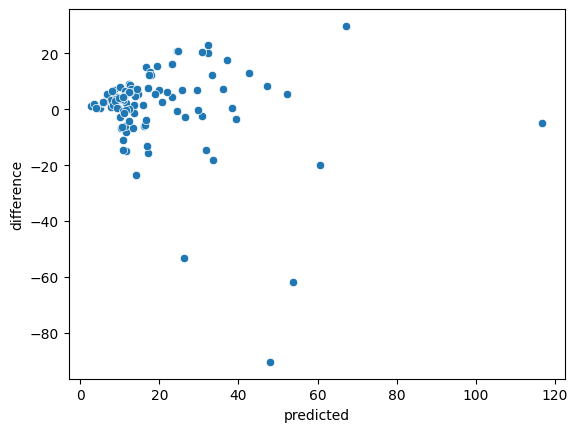

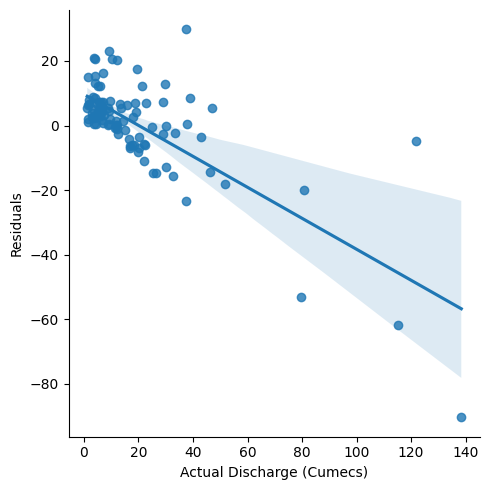

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df,x="predicted",y="difference")
plt.show()

sns.lmplot(data=df,x="actual",y="difference")
plt.xlabel("Actual Discharge (Cumecs)")
plt.ylabel("Residuals")
plt.savefig("residuals_vs_actual")
plt.show()

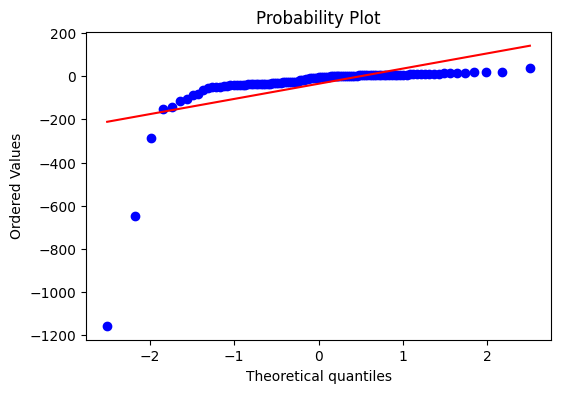

In [ ]:
from scipy.stats import probplot

fig,ax=plt.subplots(figsize=(6,4))
probplot(df["difference"],plot=ax)
plt.show()


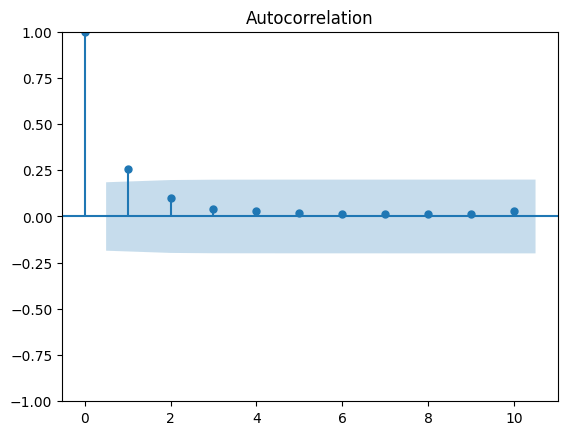

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
residuals=pd.DataFrame({"date":df["date"],"residuals":df["difference"]})
residuals.set_index("date",inplace=True,drop=True)
plot_acf(x=residuals,lags=10)
plt.show()

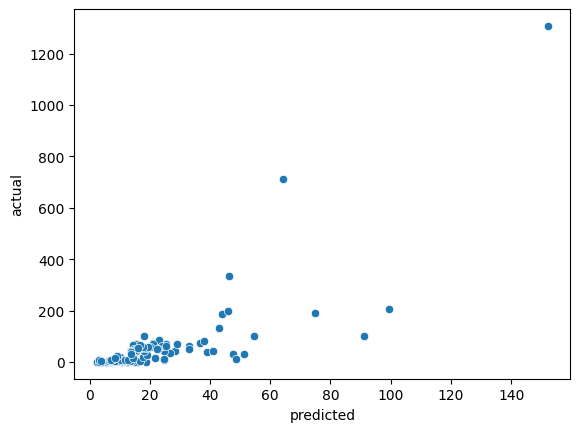

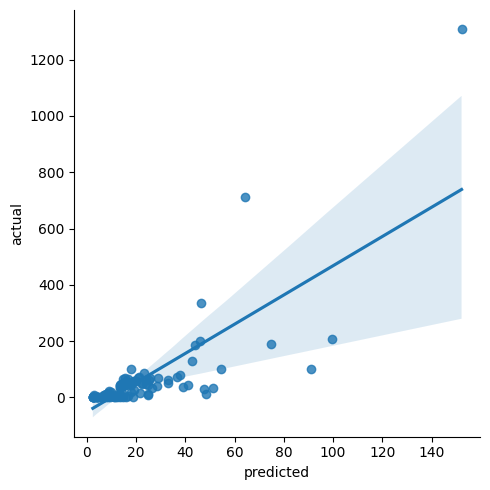

In [ ]:
sns.scatterplot(data=df,x="predicted",y="actual")
plt.show()

sns.lmplot(data=df,x="predicted",y="actual")
plt.show()

In [ ]:
from xgboost import XGBRegressor
regressor=XGBRegressor(max_depth=2,min_child_weight=3,gamma=1,colsample_bytree=0.5)

regressor.fit(x_train,y_train)
#y_train=np.exp(y_train)
#y_test=np.exp(y_test)
print(regressor.score(x_train,y_train))
r2=regressor.score(x_test,y_test)

n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-r2) * (n-1)/(n-p-1))
print("r2 score: " ,r2,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")
from sklearn.metrics import mean_squared_error,mean_absolute_error

y_preda=regressor.predict(x_train).reshape(-1,1)
y_predb=regressor.predict(x_test).reshape(-1,1)
#y_pred1=np.exp(y_pred1)
#y_pred=np.exp(y_pred)


print(mean_absolute_error(y_train,y_preda))
print(mean_absolute_error(y_test,y_predb))
arr=[]
for a in y_predb:
    for b in a:
        arr.append(b)

y_pred4=arr
len(y_pred4)

ValueError: Please reshape the input data into 2-dimensional matrix.

In [ ]:
y_pred=(np.array(y_pred0)+np.array(y_pred1)+np.array(y_pred2)+np.array(y_pred4))/5
score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

r2 score:  0.282354482847897 

adjusted r2 score:  0.25335870437710495 



#                                                                         **Simulation**

In [ ]:
simulation=pd.read_csv(r"D:\Dekstop\Dekstop folders\Data Science\python course\practice\simulation_data.csv",parse_dates=["date"],index_col="date")

rf=simulation["rainfall"]
print(simulation.columns)
simulation.drop("Unnamed: 0",axis=1,inplace=True)
simulation.drop(["rainfall"],axis=1,inplace=True)
print(simulation.info())
print(simulation.describe())
simulation

Index(['Unnamed: 0', 'rainfall', '90day', '4day'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2015-06-20 to 2015-09-03
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   90day   37 non-null     float64
 1   4day    37 non-null     float64
dtypes: float64(2)
memory usage: 888.0 bytes
None
           90day        4day
count  37.000000   37.000000
mean    4.472282   46.754054
std     1.417284   38.716036
min     1.571111    0.500000
25%     3.575556   19.100000
50%     4.591111   36.300000
75%     5.891111   71.900000
max     6.631111  142.500000


,90day,4day
date,,
2015-06-20,1.571111,26.5
2015-06-25,1.976667,36.5
2015-06-30,2.073333,18.5
2015-07-05,1.760000,0.6
2015-07-06,2.660000,81.6
...,...,...
2015-08-21,6.028889,10.4
2015-08-22,6.262222,31.4
2015-08-25,6.278889,23.5


In [ ]:

simulation_arr=scaler.transform(simulation)

ValueError: X has 2 features, but RobustScaler is expecting 4 features as input.

In [ ]:
simulation_prediction=model.predict(simulation_arr)
temp=[]
for x in simulation_prediction:
    for y in x:
        temp.append(y)
simulation_prediction=temp
    
print(simulation_prediction)
df=pd.DataFrame({"rainfall":rf.values.tolist(),"predicted discharge":simulation_prediction})
df["date"]=simulation.index
df.set_index("date",inplace=True)


pd.set_option("display.max_rows",100)
print(df)
from scipy.stats import pearsonr
print(pearsonr(df["rainfall"],df["predicted discharge"]))


2/2 [==============================] - 0s 4ms/step
[32.344395, 38.90751, 26.312769, 9.340918, 51.1062, 51.596123, 53.998245, 54.005127, 48.535423, 51.53315, 44.358215, 46.395264, 30.112099, 42.04989, 48.447777, 50.575012, 48.395966, 40.031616, 14.4735565, 28.180243, 28.844261, 29.41457, 30.216442, 21.83508, 13.30871, 31.369743, 44.070625, 53.01394, 53.318855, 52.40619, 50.31272, 15.12035, 22.218227, 38.241478, 33.226234, 39.915367, 13.256772]
            rainfall  predicted discharge
date                                     
2015-06-20      26.5            32.344395
2015-06-25      36.5            38.907509
2015-06-30      18.5            26.312769
2015-07-05       0.6             9.340918
2015-07-06      81.0            51.106201
2015-07-07       5.0            51.596123
2015-07-08      55.5            53.998245
2015-07-09       1.0            54.005127
2015-07-10       2.0            48.535423
2015-07-11      26.5            51.533150
2015-07-12      17.8            44.358215
2015-07

In [ ]:
df.plot(grid=True)

<Axes: xlabel='date'>